In [1]:
#Load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import cm
import os
#import warnings
#warnings.filterwarnings("ignore")

# Data Preparation

The datasets of following KPIs are reported and processed.

**tdis_tot**<br>
The thermal discomfort is the integral of the deviation of the temperature with respect to the predefined comfort setpoint. Its units are of K*h.

**idis_tot**<br>
The IAQ discomfort is the integral of the deviation of the CO2 concentration with respect to the predefined comfort setpoint. Its units are of ppm*h.

**ener_tot**<br>
The total building energy use in kW*h by floor area when accounting for the sum of all energy vectors present in the test case.

**cost_tot**<br>
The total building operational energy cost in euros by floor area when accounting for the sum of all energy vectors present in the test case as well as other sources of cost like water.

**emis_tot**<br>
The total building emissions in kgCO2 by floor area when accounting for the sum of all energy vectors present in the test case.

**pele_tot**<br>
The total peak 15-minute electricity demand by floor area in kW/m^2.

**pgas_tot**<br>
The total peak 15-minute gas demand by floor area in kW/m^2.

**pdih_tot**<br>
The total peak 15-minute district heating demand by floor area in kW/m^2.

**time_rat**<br>
The computational time ratio as the average ratio between the elapsed control time and the test case control step time. The elapsed control time is measured as the time between two emulator simulations. A time counter starts at the end of the 'advance' test case method and finishes at the beginning of the following call to the same method. Notice that the accounted time includes not only the controller computational time but also the signal exchange time with the controller through the RESTAPI interface.

In [2]:
#Read all KPI results spreadsheets
df_kpi_bestest_air = pd.read_csv("csv/df_kpi_bestest_air.csv")
df_kpi_bestest_hydronic = pd.read_csv("csv/df_kpi_bestest_hydronic.csv")
df_kpi_bestest_hydronic_heat_pump = pd.read_csv("csv/df_kpi_bestest_hydronic_heat_pump.csv")
df_kpi_multizone_office_simple_air = pd.read_csv("csv/df_kpi_multizone_office_simple_air.csv")
df_kpi_multizone_residential_hydronic = pd.read_csv("csv/df_kpi_multizone_residential_hydronic.csv")
df_kpi_singlezone_commercial_hydronic = pd.read_csv("csv/df_kpi_singlezone_commercial_hydronic.csv")

In [3]:
#Round decimals for each KPI
df_kpi_bestest_air=df_kpi_bestest_air.round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_bestest_hydronic=df_kpi_bestest_hydronic.round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_bestest_hydronic_heat_pump=df_kpi_bestest_hydronic_heat_pump.round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_multizone_office_simple_air=df_kpi_multizone_office_simple_air.round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_multizone_residential_hydronic=df_kpi_multizone_residential_hydronic.round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_singlezone_commercial_hydronic=df_kpi_singlezone_commercial_hydronic.round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_singlezone_commercial_hydronic.head()

,Scenario,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
0,constant+peak_heat_day,0.262,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.000027
1,constant+typical_heat_day,0.157,0.29,2.12,12196.2,0.08,0.006,NaN,0.9,0.000044
2,dynamic+peak_heat_day,0.263,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.000050
3,dynamic+typical_heat_day,0.160,0.29,2.12,12196.2,0.08,0.006,NaN,0.9,0.000044
4,highly_dynamic+peak_heat_day,0.263,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.000048


In [4]:
#Break scenarios column into time_period and energy price signal
def df_recolumn(df_model,modelname):
    df_model['price']=df_model.apply(lambda row:row['Scenario'].split('+')[0], axis = 1)
    df_model['test_day']=df_model.apply(lambda row:row['Scenario'].split('+')[1], axis = 1)
    df_model['model']=modelname
    df_model.drop(columns=['Scenario'],inplace=True)
    #Keep constant energy price signal only
    #df_model=df_model[df_model['test_day']=='constant']
    return df_model

df_kpi_bestest_air=df_recolumn(df_kpi_bestest_air,'bestest_air')
df_kpi_bestest_hydronic=df_recolumn(df_kpi_bestest_hydronic,'bestest_hydronic')
df_kpi_bestest_hydronic_heat_pump=df_recolumn(df_kpi_bestest_hydronic_heat_pump,'bestest_hydronic_heat_pump')
df_kpi_multizone_office_simple_air=df_recolumn(df_kpi_multizone_office_simple_air,'multizone_office_simple_air')
df_kpi_multizone_residential_hydronic=df_recolumn(df_kpi_multizone_residential_hydronic,'multizone_residential_hydronic')
df_kpi_singlezone_commercial_hydronic=df_recolumn(df_kpi_singlezone_commercial_hydronic,'singlezone_commercial_hydronic')
df_kpi_singlezone_commercial_hydronic.head()

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat,price,test_day,model
0,0.262,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.000027,constant,peak_heat_day,singlezone_commercial_hydronic
1,0.157,0.29,2.12,12196.2,0.08,0.006,NaN,0.9,0.000044,constant,typical_heat_day,singlezone_commercial_hydronic
2,0.263,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.000050,dynamic,peak_heat_day,singlezone_commercial_hydronic
3,0.160,0.29,2.12,12196.2,0.08,0.006,NaN,0.9,0.000044,dynamic,typical_heat_day,singlezone_commercial_hydronic
4,0.263,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.000048,highly_dynamic,peak_heat_day,singlezone_commercial_hydronic


In [5]:
#Concatenate data to one single dataframe for all the testcase models
df_kpi_all=pd.concat([df_kpi_bestest_air,df_kpi_bestest_hydronic,df_kpi_bestest_hydronic_heat_pump,
                     df_kpi_multizone_office_simple_air,df_kpi_multizone_residential_hydronic,
                      df_kpi_singlezone_commercial_hydronic],axis=0,ignore_index=True)
#Filter the dateframe to typical test days
typicaltestdays=['peak_heat_day', 'typical_heat_day', 'peak_cool_day', 'typical_cool_day', 'mix_day']
df_kpi_all_testdays=df_kpi_all[df_kpi_all['test_day'].isin(typicaltestdays)]

df_kpi_all.head()

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat,price,test_day,model
0,0.023,0.79,3.72,1219.7,NaN,0.010,0.121,5.7,0.000259,constant,peak_heat_day,bestest_air
1,0.032,0.71,2.69,1219.7,NaN,0.017,0.104,5.6,0.000032,constant,typical_heat_day,bestest_air
2,0.121,1.47,2.23,1222.1,NaN,0.033,0.022,7.7,0.000037,constant,peak_cool_day,bestest_air
3,0.060,0.73,1.10,1222.6,NaN,0.015,0.000,4.3,0.000036,constant,typical_cool_day,bestest_air
4,0.043,0.89,3.18,1220.2,NaN,0.023,0.117,5.7,0.000033,constant,mix_day,bestest_air


# Results

## Summary tables

The following table shows the statistics of the KPIs for all the testcases. From there, one could benchmark some hard-to-judge KPIs using the baseline testing data from all the testcases. For example, the third quartile value for tdis_tot is 9.8 K*h. The testing result beyond that value probably needs further attention (e.g., doublecheck the benchmark results within the testcase).

In [6]:
df_summary_stat=df_kpi_all.iloc[:,:9].describe().loc[['mean','std','min','25%','50%','75%','max','count']]
df_summary_stat.round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_unit = pd.DataFrame([['euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_summary_stat])

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
mean,0.280094,0.873659,3.349262,1863.764939,0.089689,0.015917,0.068761,9.130428,0.000103
std,0.279766,0.496141,2.742405,3275.331365,0.00174,0.010237,0.044223,6.365924,0.000451
min,0.009,0.03,0.1,0.0,0.08,0.0,0.0,0.2,0.00002
25%,0.054,0.54,1.465,0.0,0.09,0.006,0.0265,5.2,0.000044
50%,0.141,0.71,2.25,1220.0,0.09,0.018,0.085,7.0,0.000047
75%,0.513,1.22,3.97,1222.3,0.09,0.023,0.113,9.6,0.000128
max,1.007,2.25,12.42,14853.0,0.09,0.033,0.121,29.1,0.011904
count,2547.0,2547.0,2547.0,2547.0,161.0,2547.0,1619.0,2547.0,2547.0


## Summary figures

The following boxplots show the distribution of different KPIs with the typical day results annotated.

**KPI overall results - Boxplot**

This boxplot shows the distributions of different KPIs for all the testcases. The typical test days and associated testcases are marked. 

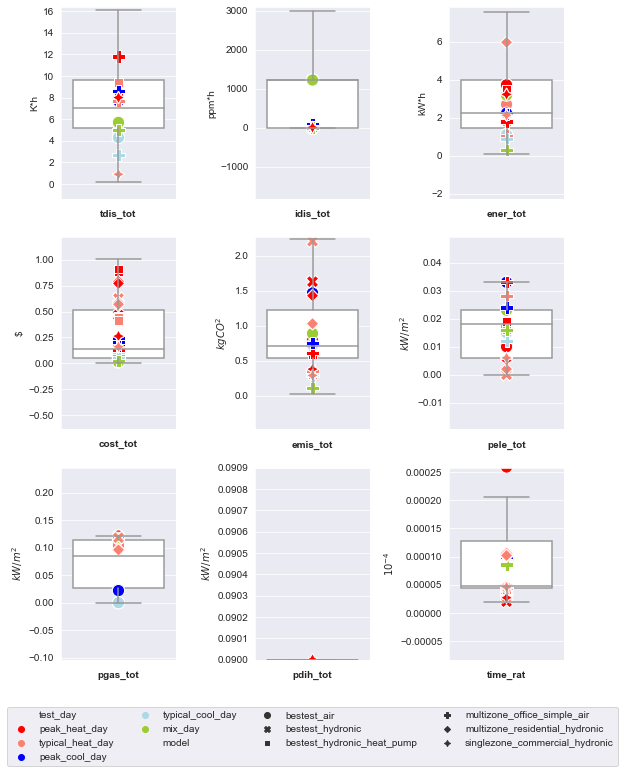

In [7]:
sns.set_style("darkgrid")
palette ={"peak_heat_day": "red", "typical_heat_day": "salmon", "peak_cool_day": "b", "typical_cool_day": "lightblue",
         "mix_day": "yellowgreen", "heat_month_average": "lightcoral", "cool_month_average": "steelblue", "annual_average": "gray"}
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO^2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']

fig, axes = plt.subplots(3,3,figsize=(9,12))
fig.subplots_adjust(hspace=0.2, wspace=0.7)
axes=axes.ravel()

for i, col in enumerate(kpi_name_lst):
    axes[i]=sns.boxplot(ax=axes[i],y=df_kpi_all[col[0]],color='white',fliersize=0,showfliers=False)
    sns.scatterplot(ax=axes[i],data=df_kpi_all_testdays,x=0,y=df_kpi_all_testdays[col[0]],
                    hue ="test_day",style="model", alpha=1, s=150, palette=palette)
    Q1 = df_kpi_all[col[0]].quantile(0.25)
    Q3 = df_kpi_all[col[0]].quantile(0.75)
    IQR = Q3 - Q1
    Q3 + 1.5 *IQR
    axes[i].set_ylim(Q1 - 1.5 * IQR, (Q3 + 1.5 *IQR)*1.01)
    #axes[i].set_ylim(df_kpi_all[col[0]].min()-df_kpi_all[col[0]].mean()*0.1, df_kpi_all[col[0]].max()*1.1)
    axes[i].set_ylabel(y_label_lst[i])
    axes[i].set_xlabel(col[0],fontweight='bold')
for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[-1].legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(-1.2, -0.4))

plt.show()

**KPI overall results filtered by model**

This boxplot shows the distributions of different KPIs for each testcase model. The typical test days are differentianted by colors. 

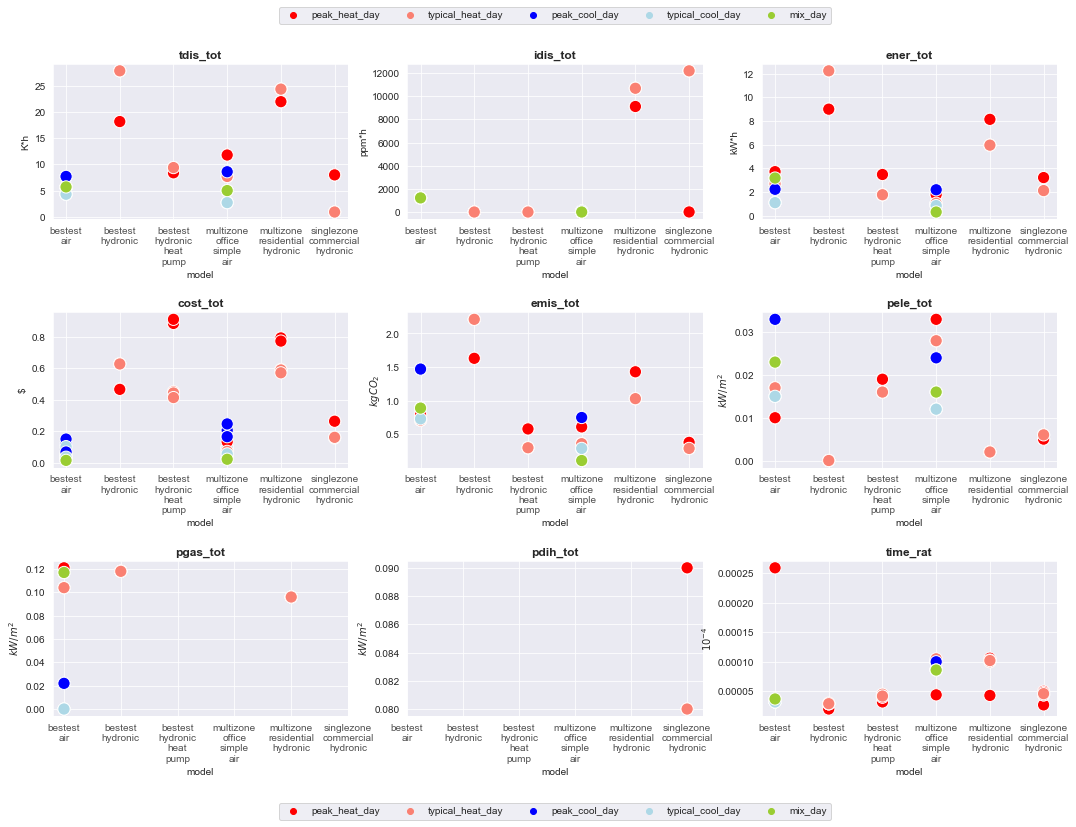

In [8]:
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO_2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']
palette ={"peak_heat_day": "red", "typical_heat_day": "salmon", "peak_cool_day": "b", "typical_cool_day": "lightblue",
         "mix_day": "yellowgreen", "heat_month_average": "lightcoral", "cool_month_average": "steelblue", "annual_average": "gray"}

fig, axes = plt.subplots(3,3, figsize=(18, 12))
axes = axes.flatten()
for i, kpi_name in enumerate(kpi_name_lst):
    #ax[i].scatter(df_kpi['model'],df_kpi[kpi_name[0]])
    axes[i]=sns.scatterplot(ax=axes[i],data=df_kpi_all_testdays,x='model',y=kpi_name[0], hue ="test_day",palette=palette, s=150)
    fig.canvas.draw()
    xlabels = ['\n'.join(t.get_text().split('_')) for t in axes[i].get_xticklabels()]
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(xlabels, alpha=0.8)
    axes[i].set_title(kpi_name[0],fontweight='bold')
    axes[i].set_ylabel(y_label_lst[i])
fig.subplots_adjust(hspace=0.6, wspace=0.2)

for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[1].legend(handles, labels, loc='upper center',ncol=5, bbox_to_anchor=(0.5, 1.4))
axes[-2].legend(handles, labels, loc='lower center',ncol=5, bbox_to_anchor=(0.5,-0.7))


**KPI overall results filtered by testdays**

This boxplot shows the distributions of different KPIs  for each typical test day. The testcase models are differentianted by shapes and colors. 

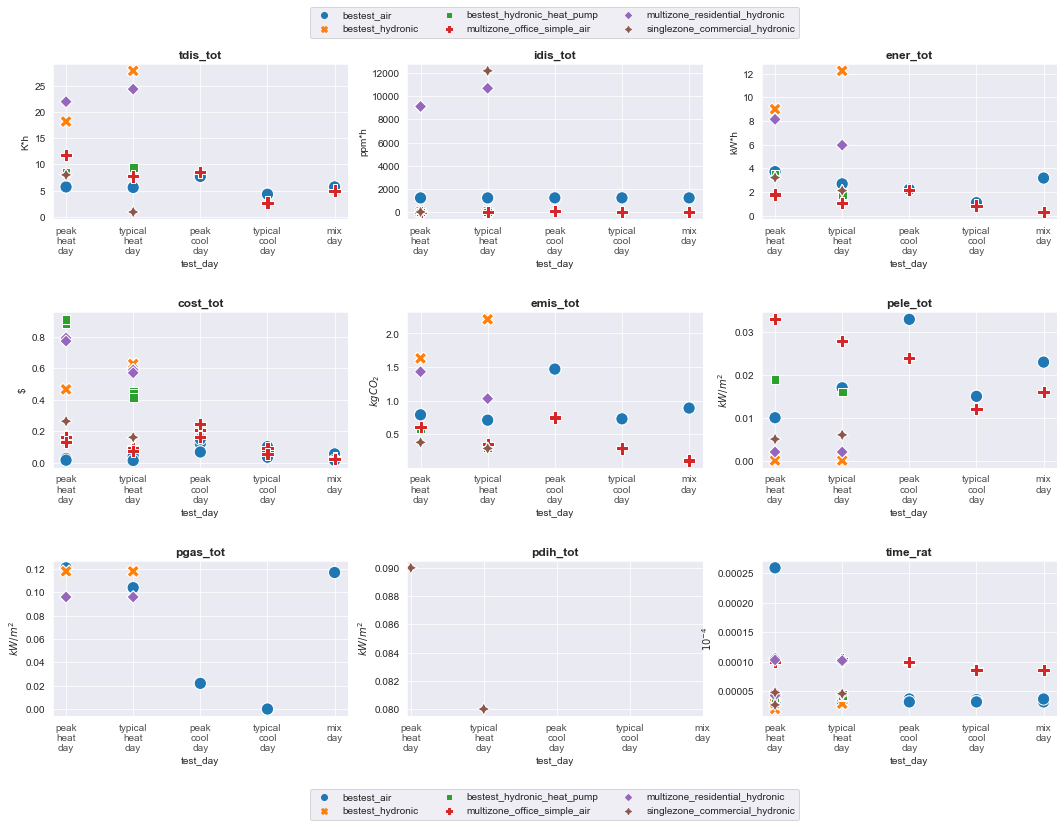

In [9]:
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO_2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']

fig, axes = plt.subplots(3,3, figsize=(18, 12))
axes = axes.flatten()
for i, kpi_name in enumerate(kpi_name_lst):
    axes[i]=sns.scatterplot(ax=axes[i],data=df_kpi_all_testdays,x='test_day',y=kpi_name[0], hue ="model", style = "model", s=150)
    fig.canvas.draw()
    xlabels = ['\n'.join(t.get_text().split('_')) for t in axes[i].get_xticklabels()]
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(xlabels, alpha=0.8)
    axes[i].set_title(kpi_name[0],fontweight='bold')
    axes[i].set_ylabel(y_label_lst[i])
fig.subplots_adjust(hspace=0.6, wspace=0.2)

for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[1].legend(handles, labels, loc='upper center',ncol=3, bbox_to_anchor=(0.5, 1.4))
axes[-2].legend(handles, labels, loc='lower center',ncol=3, bbox_to_anchor=(0.5,-0.7))


## By model results

For each testcase, the baseline testing results are visualized by a scatterplot and a boxplot to show the KPI ranges in different scenarios.

### bestest_air

The baseline testing results for the typical days with constant pricing scenario is tabulated in the following table and depicted in the scatterplot. To provide a convincing benchmark, the heating month average, cooling month average, and annual average for different KPIs are provided in the last three rows. For a specific sceanrio (e.g., constant+peak_cool_day), one could compare the customized controller performance with the baseline case results (row 2). In addition, the cooling month average (row 16) and annual average results could be compared (row 17).

<center>Typical Day Testing Result Table for Testcase bestest_air</center>

In [10]:
#Filter out typical test days
typicaltestdays=['peak_heat_day', 'typical_heat_day', 'peak_cool_day', 'typical_cool_day', 'mix_day']

#Get average KPI on heating month, cooling month, and all day
heat_month_avg=pd.concat([df_kpi_bestest_air[df_kpi_bestest_air['test_day'].str.startswith('heat_day')].mean(numeric_only=True),pd.Series({'price':'constant','test_day':'heat_month_average','model':'bestest_air'})],axis=0)
cool_month_avg=pd.concat([df_kpi_bestest_air[df_kpi_bestest_air['test_day'].str.startswith('cool_day')].mean(numeric_only=True),pd.Series({'price':'constant','test_day':'cool_month_average','model':'bestest_air'})],axis=0)
all_avg=pd.concat([df_kpi_bestest_air.mean(numeric_only=True),pd.Series({'price':'constant','test_day':'annual_average','model':'bestest_air'})],axis=0)

df_kpi_bestest_air_filter=df_kpi_bestest_air[df_kpi_bestest_air['test_day'].isin(typicaltestdays)]
df_kpi_bestest_air_filter=pd.concat([df_kpi_bestest_air_filter, pd.DataFrame(heat_month_avg).transpose(), pd.DataFrame(cool_month_avg).transpose(), pd.DataFrame(all_avg).transpose()],axis=0,ignore_index=True)
df_kpi_bestest_air_filter.iloc[:,:8]=df_kpi_bestest_air_filter.iloc[:,:8].astype(float).round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_bestest_air_filter
cols = list(df_kpi_bestest_air_filter.columns)
cols = cols[-3:-1] + cols[:-3]+ [cols[-1]]
df_kpi_md=df_kpi_bestest_air_filter[cols]
df_kpi_md=df_kpi_md.iloc[:,:-1]
df_unit = pd.DataFrame([['','','euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['price','test_day','cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_kpi_md])

,price,test_day,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,,,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
0,constant,peak_heat_day,0.023,0.79,3.72,1219.7,NaN,0.01,0.121,5.7,0.000259
1,constant,typical_heat_day,0.032,0.71,2.69,1219.7,NaN,0.017,0.104,5.6,0.000032
2,constant,peak_cool_day,0.121,1.47,2.23,1222.1,NaN,0.033,0.022,7.7,0.000037
3,constant,typical_cool_day,0.06,0.73,1.1,1222.6,NaN,0.015,0.0,4.3,0.000036
4,constant,mix_day,0.043,0.89,3.18,1220.2,NaN,0.023,0.117,5.7,0.000033
5,dynamic,peak_heat_day,0.027,0.79,3.72,1219.7,NaN,0.01,0.121,5.7,0.000033
6,dynamic,typical_heat_day,0.041,0.71,2.69,1219.7,NaN,0.017,0.104,5.6,0.000033
7,dynamic,peak_cool_day,0.15,1.47,2.23,1222.1,NaN,0.033,0.022,7.7,0.000032
8,dynamic,typical_cool_day,0.102,0.73,1.1,1222.6,NaN,0.015,0.0,4.3,0.000033


 <center> Scatterplot of Typical Day Testing Results for Testcase bestest_air </center>

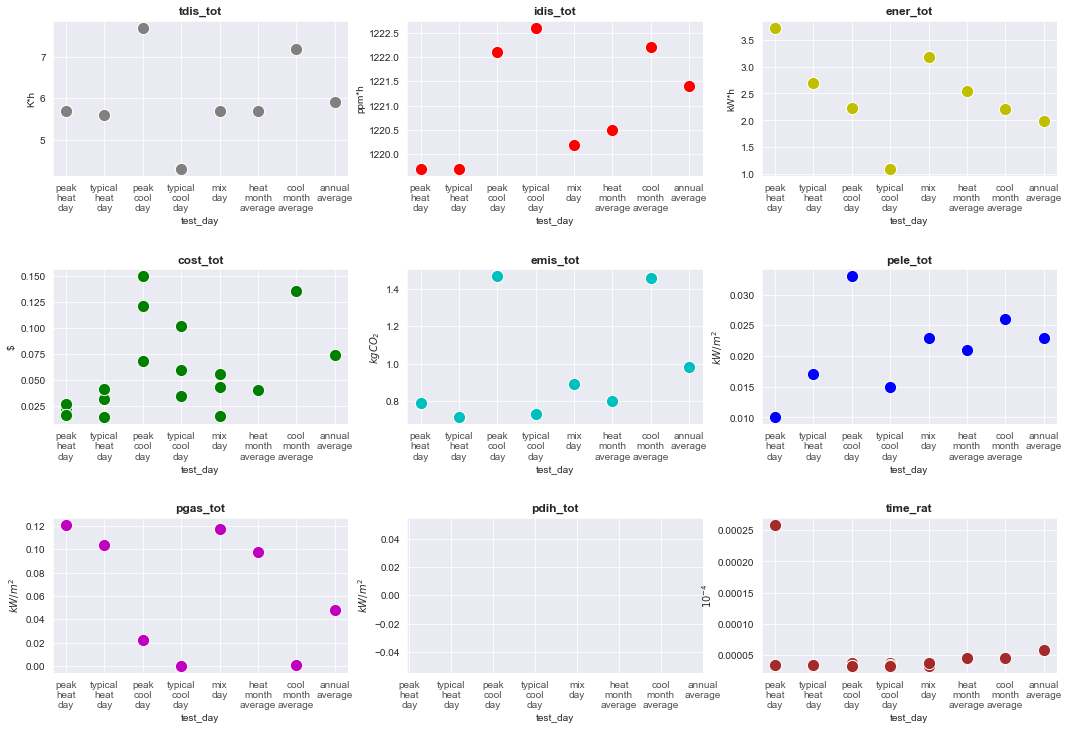

In [11]:
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO_2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']
colors = ["gray","r","y","g","c","b","m","k","brown"]
fig, axes = plt.subplots(3,3, figsize=(18, 12))
axes = axes.flatten()
for i, kpi_name in enumerate(kpi_name_lst):
    #ax[i].scatter(df_kpi['model'],df_kpi[kpi_name[0]])
    axes[i]=sns.scatterplot(ax=axes[i],data=df_kpi_bestest_air_filter,x='test_day',y=kpi_name[0], color=colors[i], s=150)
    fig.canvas.draw()
    xlabels = ['\n'.join(t.get_text().split('_')) for t in axes[i].get_xticklabels()]
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(xlabels, alpha=0.8)
    axes[i].set_title(kpi_name[0],fontweight='bold')
    axes[i].set_ylabel(y_label_lst[i])
fig.subplots_adjust(hspace=0.6, wspace=0.2)

The following table shows the statistics of the KPIs for Testcase bestest_air and the boxplot shows the distribution of different KPIs with the typical day results annotated. From there, one could benchmark some hard-to-judge KPIs from the statistics and distributions.

<center> Statistic Summary Table of All Scenarios for Testcase bestest_air </center>

In [12]:
df_summary_stat_bestest_air=df_kpi_bestest_air.iloc[:,:9].describe().loc[['mean','std','min','25%','50%','75%','max','count']].round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})

df_unit = pd.DataFrame([['euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_summary_stat_bestest_air])

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
mean,0.074,0.98,1.99,1221.4,NaN,0.023,0.048,5.9,0.000058
std,0.061,0.4,0.79,1.1,NaN,0.005,0.042,1.3,0.000354
min,0.009,0.27,0.46,1218.7,NaN,0.01,0.0,3.0,0.000023
25%,0.035,0.68,1.36,1220.5,NaN,0.018,0.0,4.9,0.000044
50%,0.055,0.81,1.91,1221.9,NaN,0.022,0.042,5.6,0.000045
75%,0.096,1.32,2.44,1222.3,NaN,0.026,0.082,6.8,0.000046
max,0.306,2.02,4.78,1223.1,NaN,0.033,0.121,9.3,0.01126
count,1049.0,1049.0,1049.0,1049.0,0.0,1049.0,1049.0,1049.0,1049.0


<center> Boxplot of All-Scenario Testing Results for Testcase bestest_air </center>

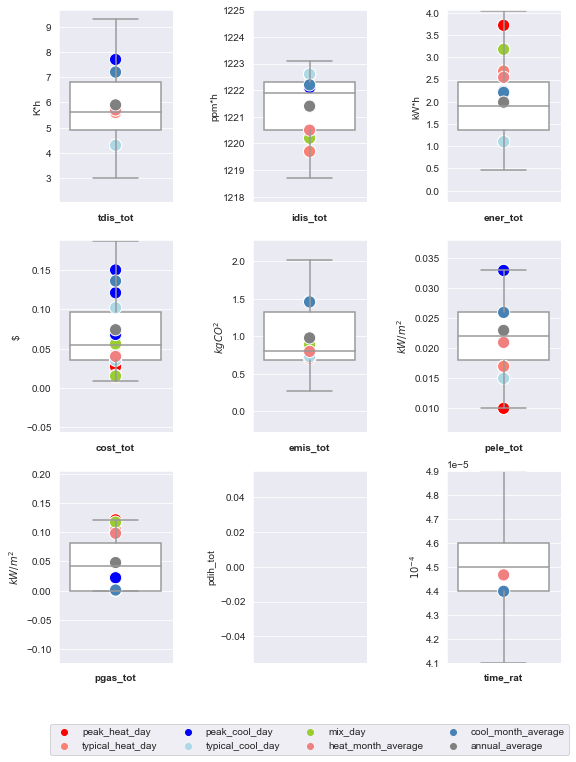

In [13]:
sns.set_style("darkgrid")

palette ={"peak_heat_day": "red", "typical_heat_day": "salmon", "peak_cool_day": "b", "typical_cool_day": "lightblue",
         "mix_day": "yellowgreen", "heat_month_average": "lightcoral", "cool_month_average": "steelblue", "annual_average": "gray"}
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO^2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']

fig, axes = plt.subplots(3,3,figsize=(9,12))
fig.subplots_adjust(hspace=0.2, wspace=0.7)
axes=axes.ravel()

for i, col in enumerate(kpi_name_lst):
    axes[i]=sns.boxplot(ax=axes[i],y=df_kpi_bestest_air[col[0]],color='white',fliersize=0,showfliers=False)
    sns.scatterplot(ax=axes[i],data=df_kpi_bestest_air_filter,x=0,y=df_kpi_bestest_air_filter[col[0]],
                    hue ="test_day", alpha=1, s=150,palette=palette)
    if math.isnan(df_kpi_bestest_air[col[0]].min()):
        continue
    else:
        Q1 = df_kpi_bestest_air[col[0]].quantile(0.25)
        Q3 = df_kpi_bestest_air[col[0]].quantile(0.75)
        IQR = Q3 - Q1
        Q3 + 1.5 *IQR
        axes[i].set_ylim(Q1 - 1.5 * IQR, (Q3 + 1.5 *IQR)*1)
        #axes[i].set_ylim(df_kpi_bestest_air[col[0]].min()-df_kpi_bestest_air[col[0]].mean()*0.1, df_kpi_bestest_air[col[0]].max()*1.1)
    axes[i].set_ylabel(y_label_lst[i])
    axes[i].set_xlabel(col[0],fontweight='bold')
for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[-1].legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(-1.2, -0.4))

plt.show()

### multizone_office_simple_air

The baseline testing results for the typical days with constant pricing scenario is tabulated in the following table and depicted in the scatterplot.
To provide a convincing benchmark, the heating month average, cooling month average, and annual average for different KPIs are provided in the last three rows. For a specific sceanrio (e.g., constant+peak_cool_day), one could compare the customized controller performance with the baseline case results (row 2). In addition, the cooling month average (row 16) and annual average results could be compared (row 17).

<center> Typical Day Testing Result Table for Testcase multizone_office_simple_air </center>

In [14]:
#Filter out typical test days
typicaltestdays=['peak_heat_day', 'typical_heat_day', 'peak_cool_day', 'typical_cool_day', 'mix_day']

#Get average KPI on heating month, cooling month, and all day
heat_month_avg=pd.concat([df_kpi_multizone_office_simple_air[df_kpi_multizone_office_simple_air['test_day'].str.startswith('heat_day')].mean(numeric_only=True),pd.Series({'price':'constant','test_day':'heat_month_average','model':'multizone_office_simple_air'})],axis=0)
cool_month_avg=pd.concat([df_kpi_multizone_office_simple_air[df_kpi_multizone_office_simple_air['test_day'].str.startswith('cool_day')].mean(numeric_only=True),pd.Series({'price':'constant','test_day':'cool_month_average','model':'multizone_office_simple_air'})],axis=0)
all_avg=pd.concat([df_kpi_multizone_office_simple_air.mean(numeric_only=True),pd.Series({'price':'constant','test_day':'annual_average','model':'multizone_office_simple_air'})],axis=0)

df_kpi_multizone_office_simple_air_filter=df_kpi_multizone_office_simple_air[df_kpi_multizone_office_simple_air['test_day'].isin(typicaltestdays)]
df_kpi_multizone_office_simple_air_filter=pd.concat([df_kpi_multizone_office_simple_air_filter, pd.DataFrame(heat_month_avg).transpose(), pd.DataFrame(cool_month_avg).transpose(), pd.DataFrame(all_avg).transpose()],axis=0,ignore_index=True)
df_kpi_multizone_office_simple_air_filter.iloc[:,:8]=df_kpi_multizone_office_simple_air_filter.iloc[:,:8].astype(float).round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_multizone_office_simple_air_filter
cols = list(df_kpi_multizone_office_simple_air_filter.columns)
cols = cols[-3:-1] + cols[:-3]+ [cols[-1]]
df_kpi_multizone_office_simple_air_md=df_kpi_multizone_office_simple_air_filter[cols]
df_kpi_multizone_office_simple_air_md=df_kpi_multizone_office_simple_air_md.iloc[:,:-1]
df_unit = pd.DataFrame([['','','euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['price','test_day','cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_kpi_multizone_office_simple_air_md])

,price,test_day,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,,,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
0,constant,peak_heat_day,0.168,0.61,1.79,0.0,NaN,0.033,NaN,11.8,0.000044
1,constant,typical_heat_day,0.099,0.36,1.05,0.0,NaN,0.028,NaN,7.7,0.000101
2,constant,peak_cool_day,0.206,0.75,2.19,79.9,NaN,0.024,NaN,8.6,0.000098
3,constant,typical_cool_day,0.08,0.29,0.85,20.3,NaN,0.012,NaN,2.7,0.000087
4,constant,mix_day,0.029,0.11,0.31,0.0,NaN,0.016,NaN,5.0,0.000086
5,dynamic,peak_heat_day,0.165,0.61,1.79,0.0,NaN,0.033,NaN,11.8,0.000099
6,dynamic,typical_heat_day,0.095,0.36,1.05,0.0,NaN,0.028,NaN,7.7,0.000104
7,dynamic,peak_cool_day,0.246,0.75,2.19,79.9,NaN,0.024,NaN,8.6,0.0001
8,dynamic,typical_cool_day,0.094,0.29,0.85,20.3,NaN,0.012,NaN,2.7,0.000088


<center> Scatterplot of Typical Day Testing Results for Testcase multizone_office_simple_air </center>

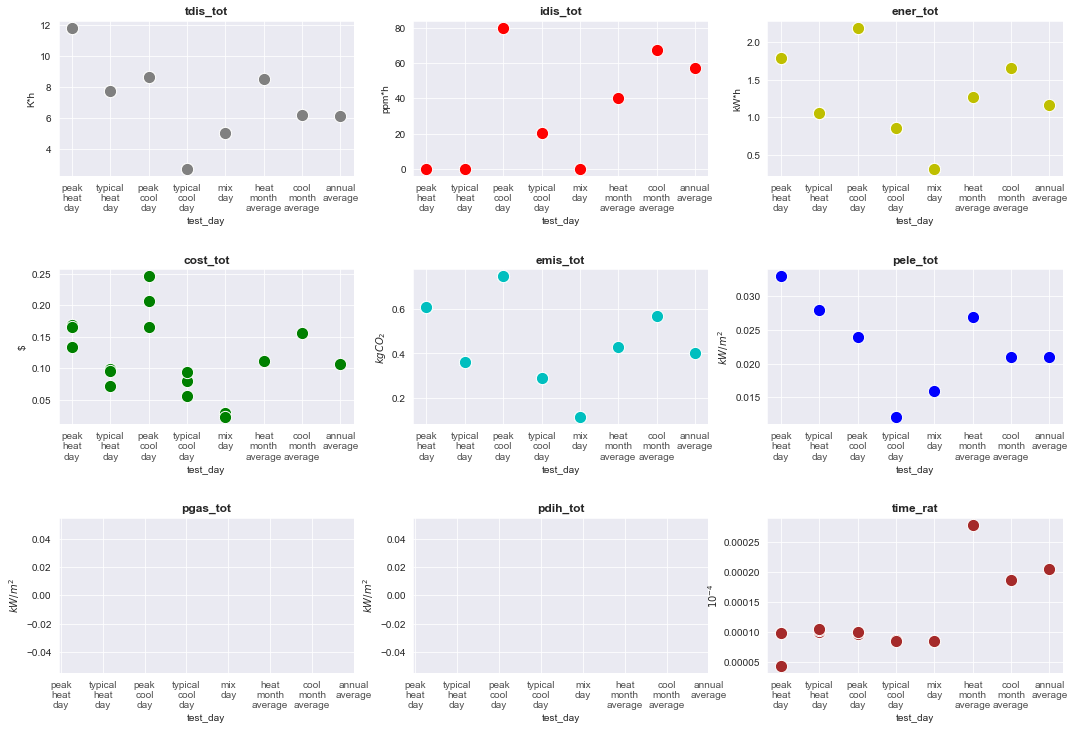

In [15]:
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO_2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']
colors = ["gray","r","y","g","c","b","m","k","brown"]
fig, axes = plt.subplots(3,3, figsize=(18, 12))
axes = axes.flatten()
for i, kpi_name in enumerate(kpi_name_lst):
    #ax[i].scatter(df_kpi['model'],df_kpi[kpi_name[0]])
    axes[i]=sns.scatterplot(ax=axes[i],data=df_kpi_multizone_office_simple_air_filter,x='test_day',y=kpi_name[0], color=colors[i], s=150)
    fig.canvas.draw()
    xlabels = ['\n'.join(t.get_text().split('_')) for t in axes[i].get_xticklabels()]
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(xlabels, alpha=0.8)
    axes[i].set_title(kpi_name[0],fontweight='bold')
    axes[i].set_ylabel(y_label_lst[i])
fig.subplots_adjust(hspace=0.6, wspace=0.2)

The following table shows the statistics of the KPIs for Testcase multizone_office_simple_air and the boxplot shows the distribution of different KPIs with the typical day results annotated. From there, one could benchmark some hard-to-judge KPIs from the statistics and distributions.

<center> Statistic Summary Table of All Scenarios for multizone_office_simple_air </center>

In [16]:
df_summary_stat_multizone_office_simple_air=df_kpi_multizone_office_simple_air.iloc[:,:9].describe().loc[['mean','std','min','25%','50%','75%','max','count']].round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_unit = pd.DataFrame([['euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_summary_stat_multizone_office_simple_air])

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
mean,0.106,0.4,1.16,57.1,NaN,0.021,NaN,6.1,0.000206
std,0.059,0.21,0.63,83.5,NaN,0.008,NaN,3.3,0.000645
min,0.009,0.03,0.1,0.0,NaN,0.004,NaN,0.2,0.000044
25%,0.056,0.21,0.6,0.0,NaN,0.014,NaN,3.9,0.000156
50%,0.11,0.42,1.23,36.0,NaN,0.022,NaN,6.2,0.000166
75%,0.146,0.56,1.63,79.6,NaN,0.028,NaN,8.3,0.000177
max,0.255,0.77,2.26,712.2,NaN,0.033,NaN,13.3,0.011904
count,482.0,482.0,482.0,482.0,0.0,482.0,0.0,482.0,482.0


<center> Boxplot of All-Scenario Testing Results for Testcase multizone_office_simple_air </center>

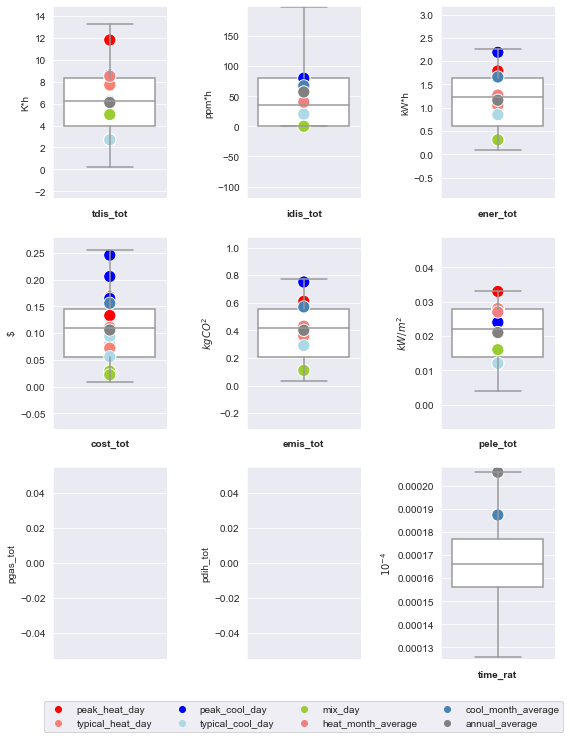

In [17]:
sns.set_style("darkgrid")

palette ={"peak_heat_day": "red", "typical_heat_day": "salmon", "peak_cool_day": "b", "typical_cool_day": "lightblue",
         "mix_day": "yellowgreen", "heat_month_average": "lightcoral", "cool_month_average": "steelblue", "annual_average": "gray"}
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO^2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']

fig, axes = plt.subplots(3,3,figsize=(9,12))
fig.subplots_adjust(hspace=0.2, wspace=0.7)
axes=axes.ravel()

for i, col in enumerate(kpi_name_lst):
    axes[i]=sns.boxplot(ax=axes[i],y=df_kpi_multizone_office_simple_air[col[0]],color='white',fliersize=0,showfliers=False)
    sns.scatterplot(ax=axes[i],data=df_kpi_multizone_office_simple_air_filter,x=0,y=df_kpi_multizone_office_simple_air_filter[col[0]],
                    hue ="test_day", alpha=1, s=150,palette=palette)
    if math.isnan(df_kpi_multizone_office_simple_air[col[0]].min()):
        continue
    else:
        Q1 = df_kpi_multizone_office_simple_air[col[0]].quantile(0.25)
        Q3 = df_kpi_multizone_office_simple_air[col[0]].quantile(0.75)
        IQR = Q3 - Q1
        Q3 + 1.5 *IQR
        axes[i].set_ylim(Q1 - 1.5 * IQR, (Q3 + 1.5 *IQR)*1)
        #axes[i].set_ylim(df_kpi_multizone_office_simple_air[col[0]].min()-df_kpi_multizone_office_simple_air[col[0]].mean()*0.1, df_kpi_multizone_office_simple_air[col[0]].max()*1.1)
    axes[i].set_ylabel(y_label_lst[i])
    axes[i].set_xlabel(col[0],fontweight='bold')
for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[-1].legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(-1.2, -0.3))

plt.show()

### bestest_hydronic

The baseline testing results for the typical days with constant pricing scenario is tabulated in the following table and depicted in the scatterplot.
To provide a convincing benchmark, the heating month average for different KPIs is provided in the last row. For a specific sceanrio (e.g., constant+peak_heat_day), one could compare the customized controller performance with the baseline case results (row 0). In addition, the heating month average results could be compared (row 6).

<center> Typical Day Testing Result Table for Testcase bestest_hydronic </center>

In [18]:
#Filter out typical test days
typicaltestdays=['peak_heat_day', 'typical_heat_day']

#Get average KPI on heating month
heat_month_avg=pd.concat([df_kpi_bestest_hydronic[df_kpi_bestest_hydronic['test_day'].str.startswith('heat_day')].mean(numeric_only=True),pd.Series({'price':'constant','test_day':'heat_month_average','model':'bestest_hydronic'})],axis=0)

df_kpi_bestest_hydronic_filter=df_kpi_bestest_hydronic[df_kpi_bestest_hydronic['test_day'].isin(typicaltestdays)]
df_kpi_bestest_hydronic_filter=pd.concat([df_kpi_bestest_hydronic_filter, pd.DataFrame(heat_month_avg).transpose()],axis=0,ignore_index=True)
df_kpi_bestest_hydronic_filter.iloc[:,:8]=df_kpi_bestest_hydronic_filter.iloc[:,:8].astype(float).round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_bestest_hydronic_filter

cols = list(df_kpi_bestest_hydronic_filter.columns)
cols = cols[-3:-1] + cols[:-3]+ [cols[-1]]
df_kpi_bestest_hydronic_md=df_kpi_bestest_hydronic_filter[cols]
df_kpi_bestest_hydronic_md=df_kpi_bestest_hydronic_md.iloc[:,:-1]
df_unit = pd.DataFrame([['','','euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['price','test_day','cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_kpi_bestest_hydronic_md])

,price,test_day,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,,,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
0,constant,peak_heat_day,0.466,1.63,9.0,0.0,NaN,0.0,0.118,18.2,0.00002
1,constant,typical_heat_day,0.627,2.21,12.24,0.0,NaN,0.0,0.118,27.9,0.000029
2,dynamic,peak_heat_day,0.466,1.63,9.0,0.0,NaN,0.0,0.118,18.2,0.000029
3,dynamic,typical_heat_day,0.627,2.21,12.24,0.0,NaN,0.0,0.118,27.9,0.000029
4,highly_dynamic,peak_heat_day,0.465,1.63,9.0,0.0,NaN,0.0,0.118,18.2,0.00003
5,highly_dynamic,typical_heat_day,0.626,2.21,12.24,0.0,NaN,0.0,0.118,27.9,0.000029
6,constant,heat_month_average,0.472,1.65,9.14,0.0,NaN,0.0,0.118,18.0,0.000064


<center> Scatterplot of Typical Day Testing Results for Testcase bestest_hydronic </center>

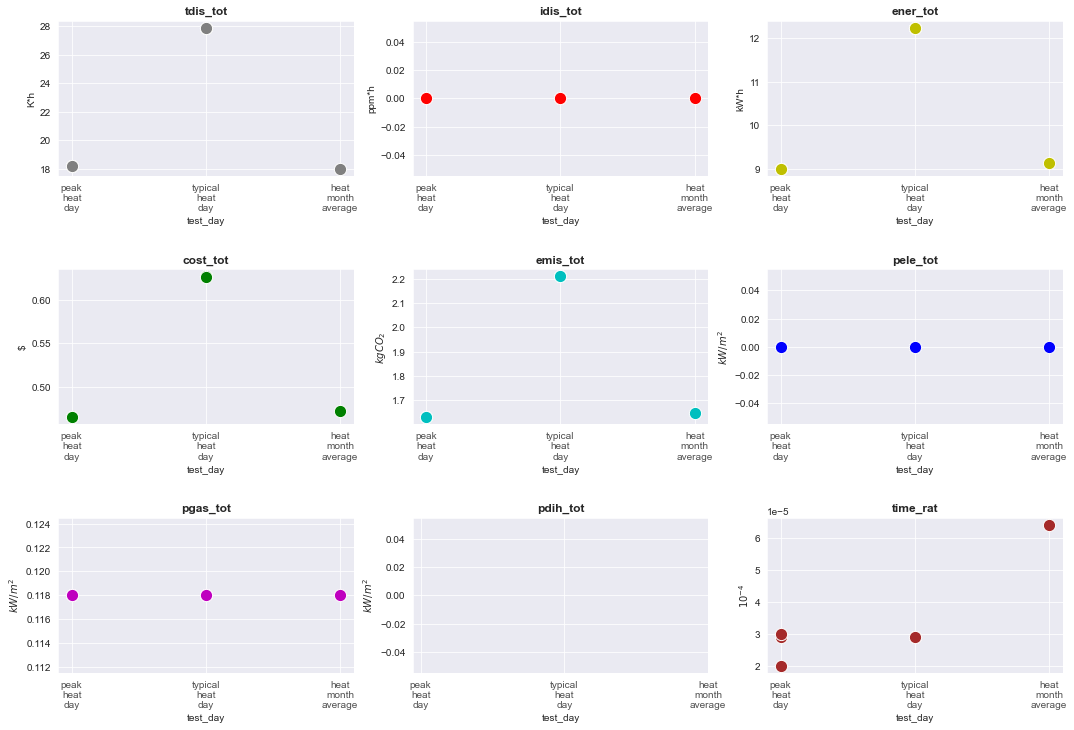

In [19]:
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO_2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']
colors = ["gray","r","y","g","c","b","m","k","brown"]
fig, axes = plt.subplots(3,3, figsize=(18, 12))
axes = axes.flatten()
for i, kpi_name in enumerate(kpi_name_lst):
    #ax[i].scatter(df_kpi['model'],df_kpi[kpi_name[0]])
    axes[i]=sns.scatterplot(ax=axes[i],data=df_kpi_bestest_hydronic_filter,x='test_day',y=kpi_name[0], color=colors[i], s=150)
    fig.canvas.draw()
    xlabels = ['\n'.join(t.get_text().split('_')) for t in axes[i].get_xticklabels()]
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(xlabels, alpha=0.8)
    axes[i].set_title(kpi_name[0],fontweight='bold')
    axes[i].set_ylabel(y_label_lst[i])
fig.subplots_adjust(hspace=0.6, wspace=0.2)

The following table shows the statistics of the KPIs for Testcase bestest_hydronic and the boxplot shows the distribution of different KPIs with the typical day results annotated. From there, one could benchmark some hard-to-judge KPIs from the statistics and distributions.

<center> Statistic Summary Table of All Scenarios for bestest_hydronic </center>

In [20]:
df_summary_stat_bestest_hydronic=df_kpi_bestest_hydronic.iloc[:,:9].describe().loc[['mean','std','min','25%','50%','75%','max','count']].round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_unit = pd.DataFrame([['euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_summary_stat_bestest_hydronic])

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
mean,0.474,1.66,9.17,0.0,NaN,0.0,0.118,18.1,0.000063
std,0.114,0.41,2.28,0.0,NaN,0.0,0.001,5.8,0.000363
min,0.213,0.72,3.98,0.0,NaN,0.0,0.114,4.5,0.00002
25%,0.477,1.67,9.22,0.0,NaN,0.0,0.118,13.6,0.000041
50%,0.508,1.78,9.85,0.0,NaN,0.0,0.118,19.2,0.000042
75%,0.541,1.9,10.53,0.0,NaN,0.0,0.118,22.4,0.000043
max,0.636,2.25,12.42,0.0,NaN,0.0,0.118,28.0,0.006166
count,285.0,285.0,285.0,285.0,0.0,285.0,285.0,285.0,285.0


<center> Boxplot of All-Scenario Testing Results for Testcase bestest_hydronic </center>

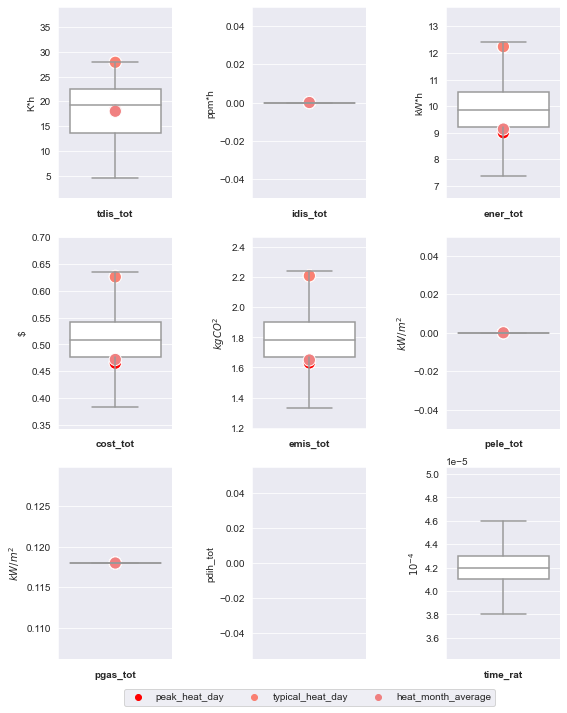

In [21]:
sns.set_style("darkgrid")

palette ={"peak_heat_day": "red", "typical_heat_day": "salmon", "peak_cool_day": "b", "typical_cool_day": "lightblue",
         "mix_day": "yellowgreen", "heat_month_average": "lightcoral", "cool_month_average": "steelblue", "annual_average": "gray"}
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO^2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']

fig, axes = plt.subplots(3,3,figsize=(9,12))
fig.subplots_adjust(hspace=0.2, wspace=0.7)
axes=axes.ravel()

for i, col in enumerate(kpi_name_lst):
    axes[i]=sns.boxplot(ax=axes[i],y=df_kpi_bestest_hydronic[col[0]],color='white',fliersize=0,showfliers=False)
    sns.scatterplot(ax=axes[i],data=df_kpi_bestest_hydronic_filter,x=0,y=df_kpi_bestest_hydronic_filter[col[0]],
                    hue ="test_day", alpha=1, s=150,palette=palette)
    if math.isnan(df_kpi_bestest_hydronic[col[0]].min()):
        continue
    else:
        Q1 = df_kpi_bestest_hydronic[col[0]].quantile(0.25)
        Q3 = df_kpi_bestest_hydronic[col[0]].quantile(0.75)
        IQR = Q3 - Q1
        Q3 + 1.5 *IQR
        axes[i].set_ylim((Q1 - 1.5 * IQR)*0.9, (Q3 + 1.5 *IQR)*1.1)
        #axes[i].set_ylim(df_kpi_bestest_hydronic[col[0]].min()-df_kpi_bestest_hydronic[col[0]].mean()*0.1, df_kpi_bestest_hydronic[col[0]].max()*1.1)
    axes[i].set_ylabel(y_label_lst[i])
    axes[i].set_xlabel(col[0],fontweight='bold')
for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[-1].legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(-1.2, -0.2))

plt.show()

### bestest_hydronic_heat_pump

The baseline testing results for the typical days with constant pricing scenario is tabulated in the following table and depicted in the scatterplot.
To provide a convincing benchmark, the heating month average for different KPIs is provided in the last row. For a specific sceanrio (e.g., constant+peak_heat_day), one could compare the customized controller performance with the baseline case results (row 0). In addition, the heating month average results could be compared (row 6).

<center> Typical Day Testing Result Table for Testcase bestest_hydronic_heat_pump </center>

In [22]:
#Filter out typical test days
typicaltestdays=['peak_heat_day', 'typical_heat_day']

#Get average KPI on heating month
heat_month_avg=pd.concat([df_kpi_bestest_hydronic_heat_pump[df_kpi_bestest_hydronic_heat_pump['test_day'].str.startswith('heat_day')].mean(numeric_only=True),pd.Series({'price':'constant','test_day':'heat_month_average','model':'bestest_hydronic_heat_pump'})],axis=0)

df_kpi_bestest_hydronic_heat_pump_filter=df_kpi_bestest_hydronic_heat_pump[df_kpi_bestest_hydronic_heat_pump['test_day'].isin(typicaltestdays)]
df_kpi_bestest_hydronic_heat_pump_filter=pd.concat([df_kpi_bestest_hydronic_heat_pump_filter, pd.DataFrame(heat_month_avg).transpose()],axis=0,ignore_index=True)
df_kpi_bestest_hydronic_heat_pump_filter.iloc[:,:8]=df_kpi_bestest_hydronic_heat_pump_filter.iloc[:,:8].astype(float).round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_bestest_hydronic_heat_pump_filter

cols = list(df_kpi_bestest_hydronic_heat_pump_filter.columns)
cols = cols[-3:-1] + cols[:-3]+ [cols[-1]]
df_kpi_bestest_hydronic_heat_pump_md=df_kpi_bestest_hydronic_heat_pump_filter[cols]
df_kpi_bestest_hydronic_heat_pump_md=df_kpi_bestest_hydronic_heat_pump_md.iloc[:,:-1]
df_unit = pd.DataFrame([['','','euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['price','test_day','cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_kpi_bestest_hydronic_heat_pump_md])

,price,test_day,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,,,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
0,constant,peak_heat_day,0.882,0.58,3.48,0.0,NaN,0.019,NaN,8.4,0.000032
1,constant,typical_heat_day,0.45,0.3,1.77,0.0,NaN,0.016,NaN,9.4,0.000045
2,dynamic,peak_heat_day,0.883,0.58,3.48,0.0,NaN,0.019,NaN,8.4,0.000041
3,dynamic,typical_heat_day,0.442,0.3,1.77,0.0,NaN,0.016,NaN,9.4,0.000041
4,highly_dynamic,peak_heat_day,0.909,0.58,3.48,0.0,NaN,0.019,NaN,8.4,0.00004
5,highly_dynamic,typical_heat_day,0.413,0.3,1.77,0.0,NaN,0.016,NaN,9.4,0.000042
6,constant,heat_month_average,0.814,0.54,3.25,0.0,NaN,0.018,NaN,7.2,0.000049


<center> Scatterplot of Typical Day Testing Results for Testcase bestest_hydronic_heat_pump </center>

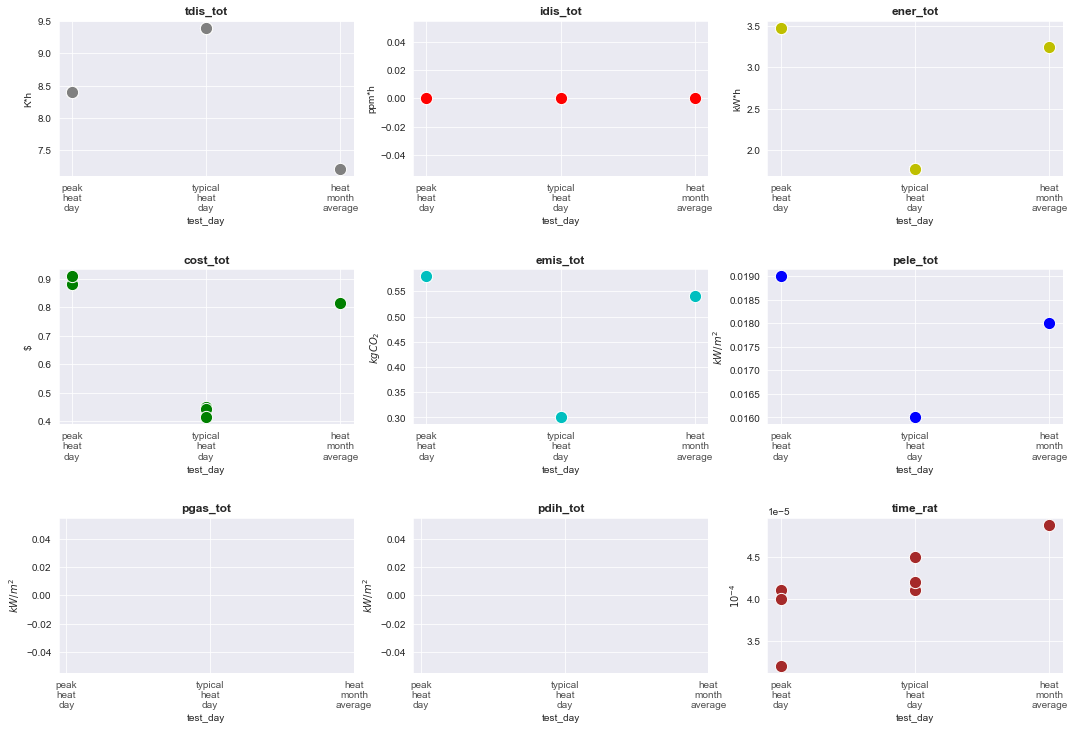

In [23]:
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO_2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']
colors = ["gray","r","y","g","c","b","m","k","brown"]
fig, axes = plt.subplots(3,3, figsize=(18, 12))
axes = axes.flatten()
for i, kpi_name in enumerate(kpi_name_lst):
    #ax[i].scatter(df_kpi['model'],df_kpi[kpi_name[0]])
    axes[i]=sns.scatterplot(ax=axes[i],data=df_kpi_bestest_hydronic_heat_pump_filter,x='test_day',y=kpi_name[0], color=colors[i], s=150)
    fig.canvas.draw()
    xlabels = ['\n'.join(t.get_text().split('_')) for t in axes[i].get_xticklabels()]
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(xlabels, alpha=0.8)
    axes[i].set_title(kpi_name[0],fontweight='bold')
    axes[i].set_ylabel(y_label_lst[i])
fig.subplots_adjust(hspace=0.6, wspace=0.2)

The following table shows the statistics of the KPIs for Testcase bestest_hydronic_heat_pump and the boxplot shows the distribution of different KPIs with the typical day results annotated. From there, one could benchmark some hard-to-judge KPIs from the statistics and distributions.

<center> Statistic Summary Table of All Scenarios for bestest_hydronic_heat_pump </center>

In [24]:
df_summary_stat_bestest_hydronic_heat_pump=df_kpi_bestest_hydronic_heat_pump.iloc[:,:9].describe().loc[['mean','std','min','25%','50%','75%','max','count']].round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_unit = pd.DataFrame([['euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_summary_stat_bestest_hydronic_heat_pump])

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
mean,0.811,0.54,3.23,0.0,NaN,0.018,NaN,7.2,0.000049
std,0.148,0.1,0.57,0.0,NaN,0.001,NaN,2.3,0.000009
min,0.413,0.3,1.77,0.0,NaN,0.015,NaN,2.6,0.000023
25%,0.785,0.55,3.31,0.0,NaN,0.017,NaN,5.5,0.000049
50%,0.865,0.57,3.43,0.0,NaN,0.019,NaN,7.3,0.00005
75%,0.902,0.59,3.56,0.0,NaN,0.019,NaN,8.7,0.000051
max,1.007,0.66,3.95,0.0,NaN,0.019,NaN,11.5,0.000159
count,285.0,285.0,285.0,285.0,0.0,285.0,0.0,285.0,285.0


<center> Boxplot of All-Scenario Testing Results for Testcase bestest_hydronic_heat_pump </center>

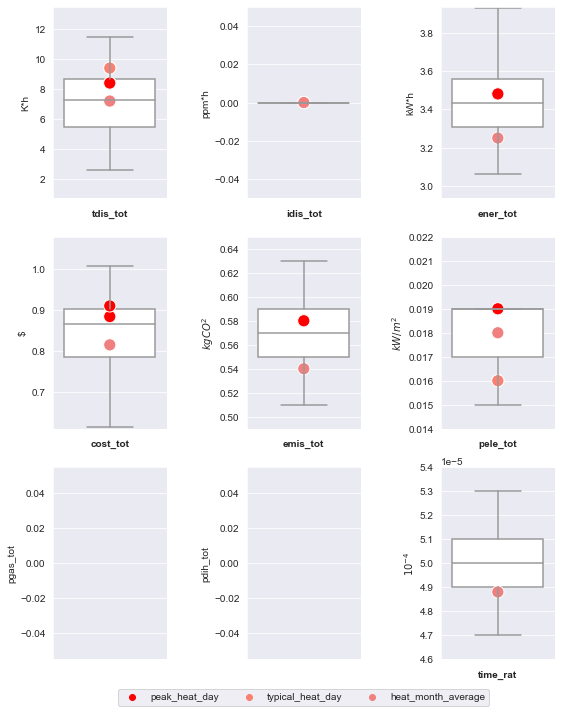

In [25]:
sns.set_style("darkgrid")

palette ={"peak_heat_day": "red", "typical_heat_day": "salmon", "peak_cool_day": "b", "typical_cool_day": "lightblue",
         "mix_day": "yellowgreen", "heat_month_average": "lightcoral", "cool_month_average": "steelblue", "annual_average": "gray"}
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO^2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']

fig, axes = plt.subplots(3,3,figsize=(9,12))
fig.subplots_adjust(hspace=0.2, wspace=0.7)
axes=axes.ravel()

for i, col in enumerate(kpi_name_lst):
    axes[i]=sns.boxplot(ax=axes[i],y=df_kpi_bestest_hydronic_heat_pump[col[0]],color='white',fliersize=0,showfliers=False)
    sns.scatterplot(ax=axes[i],data=df_kpi_bestest_hydronic_heat_pump_filter,x=0,y=df_kpi_bestest_hydronic_heat_pump_filter[col[0]],
                    hue ="test_day", alpha=1, s=150,palette=palette)
    if math.isnan(df_kpi_bestest_hydronic_heat_pump[col[0]].min()):
        continue
    else:
        Q1 = df_kpi_bestest_hydronic_heat_pump[col[0]].quantile(0.25)
        Q3 = df_kpi_bestest_hydronic_heat_pump[col[0]].quantile(0.75)
        IQR = Q3 - Q1
        Q3 + 1.5 *IQR
        axes[i].set_ylim(Q1 - 1.5 * IQR, (Q3 + 1.5 *IQR)*1)
        #axes[i].set_ylim(df_kpi_bestest_hydronic_heat_pump[col[0]].min()-df_kpi_bestest_hydronic_heat_pump[col[0]].mean()*0.1, df_kpi_bestest_hydronic_heat_pump[col[0]].max()*1.1)
    axes[i].set_ylabel(y_label_lst[i])
    axes[i].set_xlabel(col[0],fontweight='bold')
for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[-1].legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(-1.2, -0.2))

plt.show()

### multizone_residential_hydronic

The baseline testing results for the typical days with constant pricing scenario is tabulated in the following table and depicted in the scatterplot.
To provide a convincing benchmark, the heating month average for different KPIs is provided in the last row. For a specific sceanrio (e.g., constant+peak_heat_day), one could compare the customized controller performance with the baseline case results (row 0). In addition, the heating month average results could be compared (row 6).

<center> Typical Day Testing Result Table for Testcase multizone_residential_hydronic </center>

In [26]:
#Filter out typical test days
typicaltestdays=['peak_heat_day', 'typical_heat_day']

#Get average KPI on heating month
heat_month_avg=pd.concat([df_kpi_multizone_residential_hydronic[df_kpi_multizone_residential_hydronic['test_day'].str.startswith('heat_day')].mean(numeric_only=True),pd.Series({'price':'constant','test_day':'heat_month_average','model':'multizone_residential_hydronic'})],axis=0)

df_kpi_multizone_residential_hydronic_filter=df_kpi_multizone_residential_hydronic[df_kpi_multizone_residential_hydronic['test_day'].isin(typicaltestdays)]
df_kpi_multizone_residential_hydronic_filter=pd.concat([df_kpi_multizone_residential_hydronic_filter, pd.DataFrame(heat_month_avg).transpose()],axis=0,ignore_index=True)
df_kpi_multizone_residential_hydronic_filter.iloc[:,:8]=df_kpi_multizone_residential_hydronic_filter.iloc[:,:8].astype(float).round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_multizone_residential_hydronic_filter

cols = list(df_kpi_multizone_residential_hydronic_filter.columns)
cols = cols[-3:-1] + cols[:-3]+ [cols[-1]]
df_kpi_multizone_residential_hydronic_md=df_kpi_multizone_residential_hydronic_filter[cols]
df_kpi_multizone_residential_hydronic_md=df_kpi_multizone_residential_hydronic_md.iloc[:,:-1]
df_unit = pd.DataFrame([['','','euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['price','test_day','cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_kpi_multizone_residential_hydronic_md])

,price,test_day,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,,,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
0,constant,peak_heat_day,0.793,1.43,8.14,9114.6,NaN,0.002,0.096,22.0,0.000043
1,constant,typical_heat_day,0.591,1.03,5.96,10688.7,NaN,0.002,0.096,24.4,0.000101
2,dynamic,peak_heat_day,0.791,1.43,8.14,9114.6,NaN,0.002,0.096,22.0,0.000106
3,dynamic,typical_heat_day,0.588,1.03,5.96,10688.7,NaN,0.002,0.096,24.4,0.0001
4,highly_dynamic,peak_heat_day,0.771,1.43,8.14,9114.6,NaN,0.002,0.096,22.0,0.000103
5,highly_dynamic,typical_heat_day,0.57,1.03,5.96,10688.7,NaN,0.002,0.096,24.4,0.000102
6,constant,heat_month_average,0.591,1.05,6.06,10553.5,NaN,0.002,0.095,20.4,0.000167


<center> Scatterplot of Typical Day Testing Results for Testcase multizone_residential_hydronic </center>

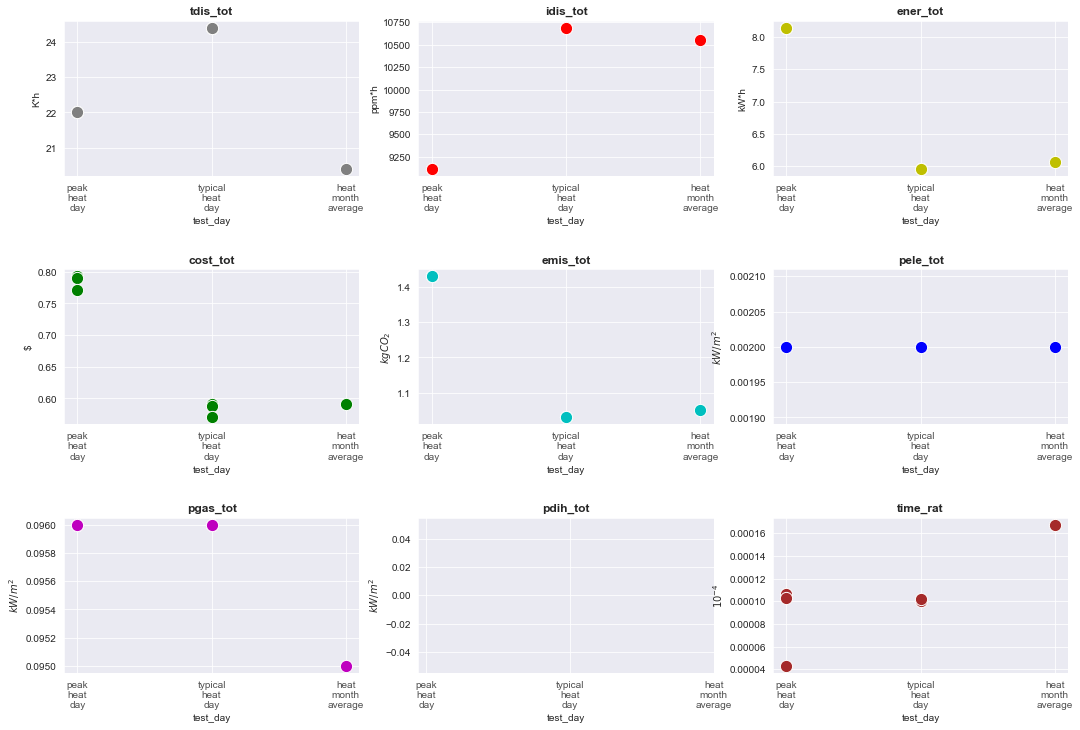

In [27]:
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO_2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']
colors = ["gray","r","y","g","c","b","m","k","brown"]
fig, axes = plt.subplots(3,3, figsize=(18, 12))
axes = axes.flatten()
for i, kpi_name in enumerate(kpi_name_lst):
    #ax[i].scatter(df_kpi['model'],df_kpi[kpi_name[0]])
    axes[i]=sns.scatterplot(ax=axes[i],data=df_kpi_multizone_residential_hydronic_filter,x='test_day',y=kpi_name[0], color=colors[i], s=150)
    fig.canvas.draw()
    xlabels = ['\n'.join(t.get_text().split('_')) for t in axes[i].get_xticklabels()]
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(xlabels, alpha=0.8)
    axes[i].set_title(kpi_name[0],fontweight='bold')
    axes[i].set_ylabel(y_label_lst[i])
fig.subplots_adjust(hspace=0.6, wspace=0.2)

The following table shows the statistics of the KPIs for Testcase multizone_residential_hydronic and the boxplot shows the distribution of different KPIs with the typical day results annotated. From there, one could benchmark some hard-to-judge KPIs from the statistics and distributions.

<center> Statistic Summary Table of All Scenarios for multizone_residential_hydronic </center>

In [28]:
df_summary_stat_multizone_residential_hydronic=df_kpi_multizone_residential_hydronic.iloc[:,:9].describe().loc[['mean','std','min','25%','50%','75%','max','count']].round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_unit = pd.DataFrame([['euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_summary_stat_multizone_residential_hydronic])

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
mean,0.593,1.06,6.08,10539.8,NaN,0.002,0.095,20.5,0.000166
std,0.14,0.26,1.46,1477.6,NaN,0.001,0.002,5.0,0.000088
min,0.095,0.16,0.96,5340.2,NaN,0.002,0.08,5.0,0.000041
25%,0.547,0.96,5.56,9965.9,NaN,0.002,0.096,18.6,0.000131
50%,0.599,1.06,6.1,10497.6,NaN,0.002,0.096,21.7,0.000177
75%,0.689,1.24,7.12,11318.6,NaN,0.002,0.096,23.5,0.000185
max,0.796,1.43,8.16,14853.0,NaN,0.007,0.096,29.1,0.001539
count,285.0,285.0,285.0,285.0,0.0,285.0,285.0,285.0,285.0


<center> Boxplot of All-Scenario Testing Results for Testcase multizone_residential_hydronic </center>

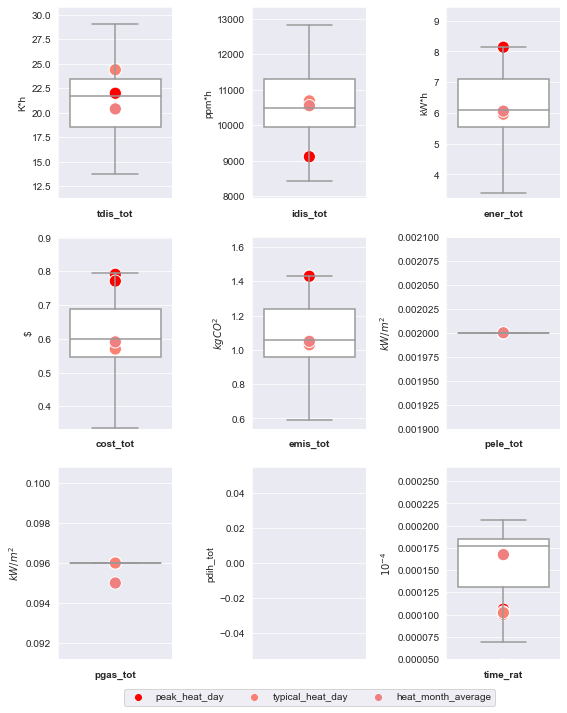

In [29]:
sns.set_style("darkgrid")

palette ={"peak_heat_day": "red", "typical_heat_day": "salmon", "peak_cool_day": "b", "typical_cool_day": "lightblue",
         "mix_day": "yellowgreen", "heat_month_average": "lightcoral", "cool_month_average": "steelblue", "annual_average": "gray"}
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO^2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']

fig, axes = plt.subplots(3,3,figsize=(9,12))
fig.subplots_adjust(hspace=0.2, wspace=0.7)
axes=axes.ravel()

for i, col in enumerate(kpi_name_lst):
    axes[i]=sns.boxplot(ax=axes[i],y=df_kpi_multizone_residential_hydronic[col[0]],color='white',fliersize=0,showfliers=False)
    sns.scatterplot(ax=axes[i],data=df_kpi_multizone_residential_hydronic_filter,x=0,y=df_kpi_multizone_residential_hydronic_filter[col[0]],
                    hue ="test_day", alpha=1, s=150,palette=palette)
    if math.isnan(df_kpi_multizone_residential_hydronic[col[0]].min()):
        continue
    else:
        Q1 = df_kpi_multizone_residential_hydronic[col[0]].quantile(0.25)
        Q3 = df_kpi_multizone_residential_hydronic[col[0]].quantile(0.75)
        IQR = Q3 - Q1
        Q3 + 1.5 *IQR
        axes[i].set_ylim(Q1 - 1.5 * IQR, (Q3 + 1.5 *IQR)*1)
        #axes[i].set_ylim(df_kpi_multizone_residential_hydronic[col[0]].min()-df_kpi_multizone_residential_hydronic[col[0]].mean()*0.1, df_kpi_multizone_residential_hydronic[col[0]].max()*1.1)
    axes[i].set_ylabel(y_label_lst[i])
    axes[i].set_xlabel(col[0],fontweight='bold')
for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[-1].legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(-1.2, -0.2))

plt.show()

### singlezone_commercial_hydronic

The baseline testing results for the typical days with constant pricing scenario is tabulated in the following table and depicted in the scatterplot.
To provide a convincing benchmark, the heating month average for different KPIs is provided in the last row. For a specific sceanrio (e.g., constant+peak_heat_day), one could compare the customized controller performance with the baseline case results (row 0). In addition, the heating month average results could be compared (row 6).

<center>  Typical Day Testing Result Table for Testcase singlezone_commercial_hydronic </center>

In [30]:
#Filter out typical test days
typicaltestdays=['peak_heat_day', 'typical_heat_day']

#Get average KPI on heating month
heat_month_avg=pd.concat([df_kpi_singlezone_commercial_hydronic[df_kpi_singlezone_commercial_hydronic['test_day'].str.startswith('heat_day')].mean(numeric_only=True),pd.Series({'price':'constant','test_day':'heat_month_average','model':'singlezone_commercial_hydronic'})],axis=0)

df_kpi_singlezone_commercial_hydronic_filter=df_kpi_singlezone_commercial_hydronic[df_kpi_singlezone_commercial_hydronic['test_day'].isin(typicaltestdays)]
df_kpi_singlezone_commercial_hydronic_filter=pd.concat([df_kpi_singlezone_commercial_hydronic_filter, pd.DataFrame(heat_month_avg).transpose()],axis=0,ignore_index=True)
df_kpi_singlezone_commercial_hydronic_filter.iloc[:,:8]=df_kpi_singlezone_commercial_hydronic_filter.iloc[:,:8].astype(float).round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_kpi_singlezone_commercial_hydronic_filter

cols = list(df_kpi_singlezone_commercial_hydronic_filter.columns)
cols = cols[-3:-1] + cols[:-3]+ [cols[-1]]
df_kpi_singlezone_commercial_hydronic_md=df_kpi_singlezone_commercial_hydronic_filter[cols]
df_kpi_singlezone_commercial_hydronic_md=df_kpi_singlezone_commercial_hydronic_md.iloc[:,:-1]
df_unit = pd.DataFrame([['','','euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['price','test_day','cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_kpi_singlezone_commercial_hydronic_md])

,price,test_day,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,,,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
0,constant,peak_heat_day,0.262,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.000027
1,constant,typical_heat_day,0.157,0.29,2.12,12196.2,0.08,0.006,NaN,0.9,0.000044
2,dynamic,peak_heat_day,0.263,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.00005
3,dynamic,typical_heat_day,0.16,0.29,2.12,12196.2,0.08,0.006,NaN,0.9,0.000044
4,highly_dynamic,peak_heat_day,0.263,0.38,3.22,5.4,0.09,0.005,NaN,8.0,0.000048
5,highly_dynamic,typical_heat_day,0.161,0.29,2.12,12196.2,0.08,0.006,NaN,0.9,0.000046
6,constant,heat_month_average,0.308,0.47,3.84,2566.3,0.09,0.006,NaN,7.0,0.000147


<center> Scatterplot of Typical Day Testing Results for Testcase singlezone_commercial_hydronic </center>

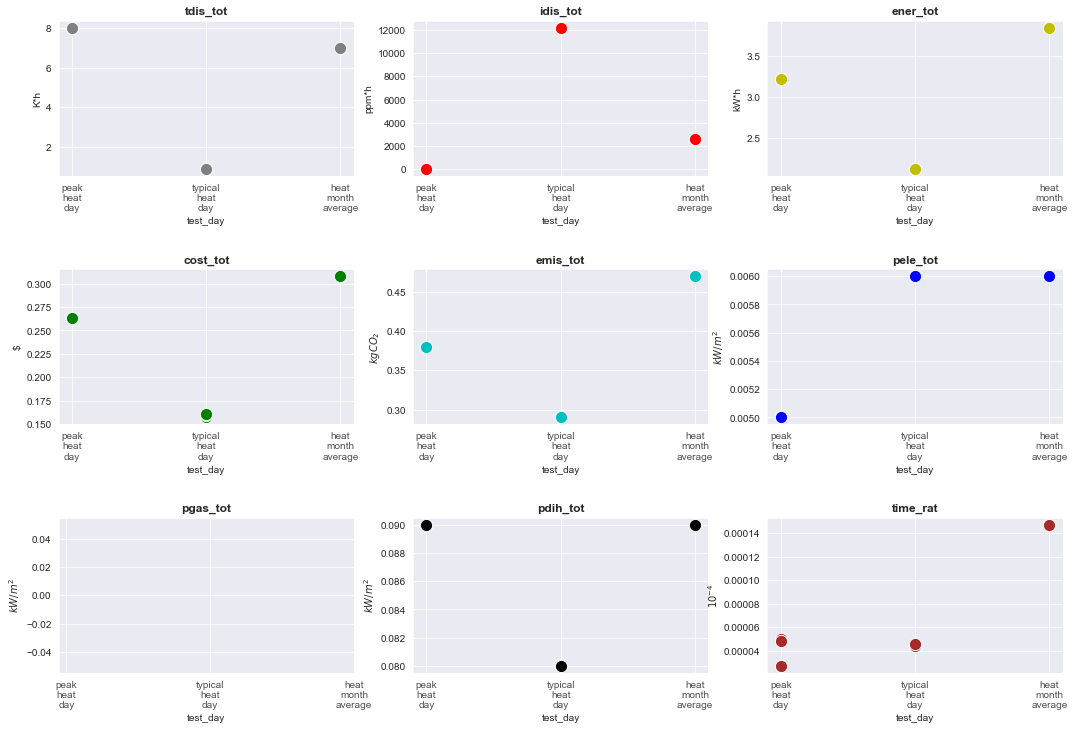

In [31]:
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO_2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']
colors = ["gray","r","y","g","c","b","m","k","brown"]
fig, axes = plt.subplots(3,3, figsize=(18, 12))
axes = axes.flatten()
for i, kpi_name in enumerate(kpi_name_lst):
    #ax[i].scatter(df_kpi['model'],df_kpi[kpi_name[0]])
    axes[i]=sns.scatterplot(ax=axes[i],data=df_kpi_singlezone_commercial_hydronic_filter,x='test_day',y=kpi_name[0], color=colors[i], s=150)
    fig.canvas.draw()
    xlabels = ['\n'.join(t.get_text().split('_')) for t in axes[i].get_xticklabels()]
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(xlabels, alpha=0.8)
    axes[i].set_title(kpi_name[0],fontweight='bold')
    axes[i].set_ylabel(y_label_lst[i])
fig.subplots_adjust(hspace=0.6, wspace=0.2)

The following table shows the statistics of the KPIs for Testcase singlezone_commercial_hydronic and the boxplot shows the distribution of different KPIs with the typical day results annotated. From there, one could benchmark some hard-to-judge KPIs from the statistics and distributions.

<center> Statistic Summary Table of All Scenarios for singlezone_commercial_hydronic </center>

In [32]:
df_summary_stat_singlezone_commercial_hydronic=df_kpi_singlezone_commercial_hydronic.iloc[:,:9].describe().loc[['mean','std','min','25%','50%','75%','max','count']].round({'tdis_tot': 1, 'idis_tot': 1, 'ener_tot': 2, 'cost_tot': 3, 'emis_tot': 2, 'pele_tot': 3, 'pgas_tot': 3, 'pdih_tot': 2, 'time_rat': 6})
df_unit = pd.DataFrame([['euro','kg$CO_2$','kW*h','ppm*h','kW/$m^2$','kW/$m^2$','kW/$m^2$','K*h','1']], 
                       columns=['cost_tot','emis_tot','ener_tot','idis_tot','pdih_tot',
                                'pele_tot','pgas_tot','tdis_tot','time_rat'],index=['unit'])
pd.concat([df_unit,df_summary_stat_singlezone_commercial_hydronic])

,cost_tot,emis_tot,ener_tot,idis_tot,pdih_tot,pele_tot,pgas_tot,tdis_tot,time_rat
unit,euro,kg$CO_2$,kW*h,ppm*h,kW/$m^2$,kW/$m^2$,kW/$m^2$,K*h,1
mean,0.304,0.47,3.79,2698.0,0.09,0.006,NaN,6.9,0.000143
std,0.052,0.08,0.65,2667.6,0.0,0.001,NaN,2.0,0.000925
min,0.157,0.29,2.12,2.1,0.08,0.001,NaN,0.9,0.000027
25%,0.263,0.38,3.22,418.0,0.09,0.006,NaN,5.4,0.000068
50%,0.296,0.47,3.75,2275.0,0.09,0.006,NaN,7.2,0.000072
75%,0.355,0.54,4.41,3574.9,0.09,0.006,NaN,8.4,0.000075
max,0.397,0.61,4.97,12196.2,0.09,0.006,NaN,11.3,0.011796
count,161.0,161.0,161.0,161.0,161.0,161.0,0.0,161.0,161.0


<center> Boxplot of All-Scenario Testing Results for Testcase singlezone_commercial_hydronic </center>

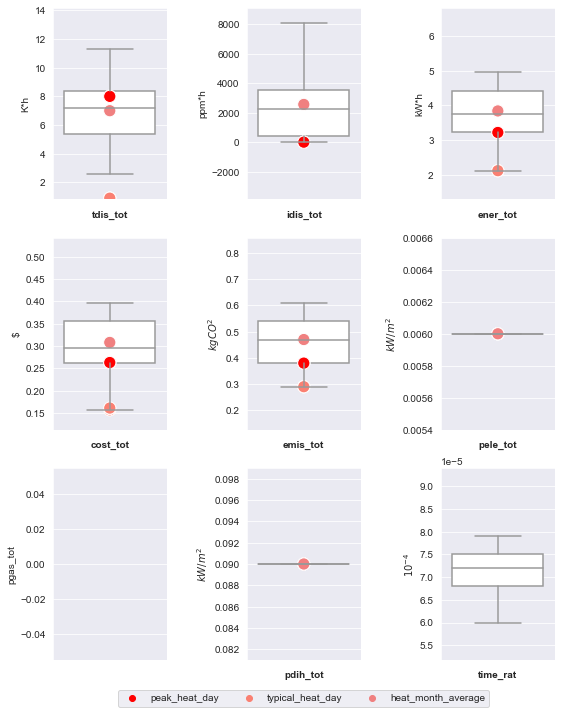

In [33]:
sns.set_style("darkgrid")

palette ={"peak_heat_day": "red", "typical_heat_day": "salmon", "peak_cool_day": "b", "typical_cool_day": "lightblue",
         "mix_day": "yellowgreen", "heat_month_average": "lightcoral", "cool_month_average": "steelblue", "annual_average": "gray"}
kpi_name_lst = [['tdis_tot'], ['idis_tot'], ['ener_tot'], ['cost_tot'], ['emis_tot'], ['pele_tot'],
       ['pgas_tot'], ['pdih_tot'], ['time_rat']]
y_label_lst=['K*h','ppm*h','kW*h','$','$kgCO^2$','$kW/m^2$','$kW/m^2$', '$kW/m^2$','$10^{-4}$']

fig, axes = plt.subplots(3,3,figsize=(9,12))
fig.subplots_adjust(hspace=0.2, wspace=0.7)
axes=axes.ravel()

for i, col in enumerate(kpi_name_lst):
    axes[i]=sns.boxplot(ax=axes[i],y=df_kpi_singlezone_commercial_hydronic[col[0]],color='white',fliersize=0,showfliers=False)
    sns.scatterplot(ax=axes[i],data=df_kpi_singlezone_commercial_hydronic_filter,x=0,y=df_kpi_singlezone_commercial_hydronic_filter[col[0]],
                    hue ="test_day", alpha=1, s=150,palette=palette)
    if math.isnan(df_kpi_singlezone_commercial_hydronic[col[0]].min()):
        continue
    else:
        Q1 = df_kpi_singlezone_commercial_hydronic[col[0]].quantile(0.25)
        Q3 = df_kpi_singlezone_commercial_hydronic[col[0]].quantile(0.75)
        IQR = Q3 - Q1
        Q3 + 1.5 *IQR
        axes[i].set_ylim((Q1 - 1.5 * IQR)*0.9, (Q3 + 1.5 *IQR)*1.1)
        #axes[i].set_ylim(df_kpi_singlezone_commercial_hydronic[col[0]].min()-df_kpi_singlezone_commercial_hydronic[col[0]].mean()*0.1, df_kpi_singlezone_commercial_hydronic[col[0]].max()*1.1)
    axes[i].set_ylabel(y_label_lst[i])
    axes[i].set_xlabel(col[0],fontweight='bold')
for ax in axes:
    ax.legend([],[], frameon=False)
handles, labels  =  axes[-1].get_legend_handles_labels()  
axes[-1].legend(handles, labels, loc='center',ncol=4, bbox_to_anchor=(-1.2, -0.2))

plt.show()